In [1]:
# Importamos las librerías necesarias para el análisis de datos y visualización e instalación de scikit-learn para el modelado de datos.

!pip install folium
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Cargamos el excel con la hoja "Análisis" utilizando el motor "openpyxl" y vemos el tamaño de la tabla

ruta_archivo = r"Trabajo_excel_python.xlsx"

df = pd.read_excel(
    ruta_archivo,
    sheet_name="Análisis",
    engine="openpyxl"
)

df.shape

(43000, 30)

In [3]:
# Para evitar errores y columnas mal escritas en el futuro, vamos a eliminar los espacios en blanco de los nombres de las columnas

print(df.shape)
print(df.columns)

(43000, 30)
Index(['Year', 'Start date', 'Age', 'Job', 'Education', 'Marital', 'Income',
       'Kidhome', 'Teenhome', 'Payment default', 'Housing', 'Loan',
       'NumWebVisitsMonth', 'Service/product contracted',
       'Current campaign calls', 'Duration', 'Days from last call',
       'Previous contacts', 'Interaction date',
       'Previous marketing campaign outcome', 'Employment var.rate',
       'Cons.price.idx', 'Cons.conf.idx', 'Euribor3months', 'Nr.employed',
       'Latitude', 'Longitude', 'Latitude OK', 'Longitude OK', 'ID'],
      dtype='object')


In [4]:
# Revisión de nulos

df.isnull().sum()


Year                                      0
Start date                              248
Age                                    5120
Job                                     345
Education                              1807
Marital                                  85
Income                                    0
Kidhome                                   0
Teenhome                                  0
Payment default                        8981
Housing                                1026
Loan                                   1026
NumWebVisitsMonth                         0
Service/product contracted                0
Current campaign calls                    0
Duration                                  0
Days from last call                       0
Previous contacts                         0
Interaction date                          0
Previous marketing campaign outcome       0
Employment var.rate                       0
Cons.price.idx                          471
Cons.conf.idx                   

In [5]:
# Vemos las primeras filas (aparece Latitude OK y Longitude OK, así que están bien)

df.head()

,Year,Start date,Age,Job,Education,Marital,Income,Kidhome,Teenhome,Payment default,Housing,Loan,NumWebVisitsMonth,Service/product contracted,Current campaign calls,Duration,Days from last call,Previous contacts,Interaction date,Previous marketing campaign outcome,Employment var.rate,Cons.price.idx,Cons.conf.idx,Euribor3months,Nr.employed,Latitude,Longitude,Latitude OK,Longitude OK,ID
0,2012,2019-08-02,NaN,housemaid,basic.4y,MARRIED,161770,1,0,0.00,NO,NO,29,NO,1,261,999,0,2012-04-04,NONEXISTENT,11,93.99,-36.40,4.86,5191,41495,-71233,41.49,-71.23,089b39d8-e4d0-461b-87d4-814d71e0e079
1,2012,2016-09-14,57.00,services,high.school,MARRIED,85477,1,1,NaN,NO,NO,7,NO,1,149,999,0,2012-12-30,NONEXISTENT,11,93.99,-36.40,NaN,5191,34601,-83923,34.60,-83.92,e9d37224-cb6f-4942-98d7-46672963d097
2,2012,2019-02-15,37.00,services,high.school,MARRIED,147233,1,1,0.00,YES,NO,5,NO,1,226,999,0,2012-02-02,NONEXISTENT,11,93.99,-36.40,4.86,5191,34939,-94847,34.94,-94.85,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,2012,2015-11-29,40.00,admin.,basic.6y,MARRIED,121393,1,2,0.00,NO,NO,29,NO,1,151,999,0,2012-12-21,NONEXISTENT,11,93.99,-36.40,NaN,5191,49041,-70308,49.04,-70.31,9991fafb-4447-451a-8be2-b0df6098d13e
4,2012,2017-01-29,56.00,services,high.school,MARRIED,63164,1,2,0.00,NO,YES,20,NO,1,307,999,0,2012-06-20,NONEXISTENT,11,93.99,-36.40,NaN,5191,38033,-104463,38.03,-104.46,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [6]:
# Vemos las columnas 

df.columns.tolist()

['Year',
 'Start date',
 'Age',
 'Job',
 'Education',
 'Marital',
 'Income',
 'Kidhome',
 'Teenhome',
 'Payment default',
 'Housing',
 'Loan',
 'NumWebVisitsMonth',
 'Service/product contracted',
 'Current campaign calls',
 'Duration',
 'Days from last call',
 'Previous contacts',
 'Interaction date',
 'Previous marketing campaign outcome',
 'Employment var.rate',
 'Cons.price.idx',
 'Cons.conf.idx',
 'Euribor3months',
 'Nr.employed',
 'Latitude',
 'Longitude',
 'Latitude OK',
 'Longitude OK',
 'ID']

In [7]:
# Información general del dataframe para ver los nulos, el tamaño real y los tipos de columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Year                                 43000 non-null  int64         
 1   Start date                           42752 non-null  datetime64[ns]
 2   Age                                  37880 non-null  float64       
 3   Job                                  42655 non-null  object        
 4   Education                            41193 non-null  object        
 5   Marital                              42915 non-null  object        
 6   Income                               43000 non-null  int64         
 7   Kidhome                              43000 non-null  int64         
 8   Teenhome                             43000 non-null  int64         
 9   Payment default                      34019 non-null  float64       
 10  Housing   

In [8]:
# Resumen estadístico

df.describe(include="all")

,Year,Start date,Age,Job,Education,Marital,Income,Kidhome,Teenhome,Payment default,Housing,Loan,NumWebVisitsMonth,Service/product contracted,Current campaign calls,Duration,Days from last call,Previous contacts,Interaction date,Previous marketing campaign outcome,Employment var.rate,Cons.price.idx,Cons.conf.idx,Euribor3months,Nr.employed,Latitude,Longitude,Latitude OK,Longitude OK,ID
count,"43,000.00",42752,"37,880.00",42655,41193,42915,"43,000.00","43,000.00","43,000.00","34,019.00",41974,41974,"43,000.00",43000,"43,000.00","43,000.00","43,000.00","43,000.00",43000,43000,"43,000.00","42,529.00","43,000.00","33,744.00","43,000.00","43,000.00","43,000.00","43,000.00","43,000.00",43000
unique,NaN,NaN,NaN,11,7,3,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43000
top,NaN,NaN,NaN,admin.,university.degree,MARRIED,NaN,NaN,NaN,NaN,YES,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NONEXISTENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,NaN,NaN,NaN,10873,12722,25999,NaN,NaN,NaN,NaN,22498,35442,NaN,38156,NaN,NaN,NaN,NaN,NaN,37103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,"2,012.86",2017-07-01 19:55:11.676646656,39.98,NaN,NaN,NaN,"93,241.20",1.00,1.00,0.00,NaN,NaN,16.59,NaN,2.57,257.74,962.33,0.17,2013-05-12 07:05:06.083720960,NaN,0.77,93.57,-40.51,3.62,"5,166.84","33,515.78","-86,994.72",33.52,-86.99,NaN
min,"2,012.00",2015-01-01 00:00:00,17.00,NaN,NaN,NaN,"5,841.00",0.00,0.00,0.00,NaN,NaN,1.00,NaN,1.00,0.00,0.00,0.00,2012-01-01 00:00:00,NaN,-34.00,92.20,-50.80,0.63,"4,964.00",244.00,"-124,997.00",0.24,-125.00,NaN
25%,"2,012.00",2016-04-01 00:00:00,32.00,NaN,NaN,NaN,"49,610.00",0.00,0.00,0.00,NaN,NaN,9.00,NaN,1.00,102.00,999.00,0.00,2012-07-16 00:00:00,NaN,-18.00,93.08,-42.70,1.34,"5,099.00","28,486.00","-108,744.25",28.49,-108.74,NaN
50%,"2,013.00",2017-07-04 00:00:00,38.00,NaN,NaN,NaN,"93,050.50",1.00,1.00,0.00,NaN,NaN,17.00,NaN,2.00,179.00,999.00,0.00,2013-03-02 00:00:00,NaN,11.00,93.75,-41.80,4.86,"5,191.00","35,432.00","-92,516.50",35.43,-92.52,NaN
75%,"2,014.00",2018-10-01 06:00:00,47.00,NaN,NaN,NaN,"136,744.50",2.00,2.00,0.00,NaN,NaN,25.00,NaN,3.00,319.00,999.00,0.00,2014-03-29 00:00:00,NaN,14.00,93.99,-36.40,4.96,"5,228.00","42,414.00","-76,442.00",42.41,-76.44,NaN
max,"2,014.00",2019-12-31 00:00:00,98.00,NaN,NaN,NaN,"180,802.00",2.00,2.00,10.00,NaN,NaN,32.00,NaN,56.00,"4,918.00",999.00,7.00,2014-12-31 00:00:00,NaN,14.00,94.77,-26.90,5.04,"5,228.00","49,384.00",-672.00,49.38,-0.67,NaN


In [9]:
# Contamos los valores nulos por columna y los ordenamos de mayor a menor para ver cuáles son las columnas con más nulos

df.isnull().sum().sort_values(ascending=False)

Euribor3months                         9256
Payment default                        8981
Age                                    5120
Education                              1807
Loan                                   1026
Housing                                1026
Cons.price.idx                          471
Job                                     345
Start date                              248
Marital                                  85
Teenhome                                  0
Kidhome                                   0
Year                                      0
Income                                    0
Service/product contracted                0
NumWebVisitsMonth                         0
Days from last call                       0
Current campaign calls                    0
Previous contacts                         0
Interaction date                          0
Previous marketing campaign outcome       0
Duration                                  0
Employment var.rate             

In [10]:
# Hacemos comprobación aquí también para ver posibles duplicados

df.duplicated().sum()

np.int64(0)

In [11]:
# Vemos de nuevo las primeras filas tras los cambios

df.head()

,Year,Start date,Age,Job,Education,Marital,Income,Kidhome,Teenhome,Payment default,Housing,Loan,NumWebVisitsMonth,Service/product contracted,Current campaign calls,Duration,Days from last call,Previous contacts,Interaction date,Previous marketing campaign outcome,Employment var.rate,Cons.price.idx,Cons.conf.idx,Euribor3months,Nr.employed,Latitude,Longitude,Latitude OK,Longitude OK,ID
0,2012,2019-08-02,NaN,housemaid,basic.4y,MARRIED,161770,1,0,0.00,NO,NO,29,NO,1,261,999,0,2012-04-04,NONEXISTENT,11,93.99,-36.40,4.86,5191,41495,-71233,41.49,-71.23,089b39d8-e4d0-461b-87d4-814d71e0e079
1,2012,2016-09-14,57.00,services,high.school,MARRIED,85477,1,1,NaN,NO,NO,7,NO,1,149,999,0,2012-12-30,NONEXISTENT,11,93.99,-36.40,NaN,5191,34601,-83923,34.60,-83.92,e9d37224-cb6f-4942-98d7-46672963d097
2,2012,2019-02-15,37.00,services,high.school,MARRIED,147233,1,1,0.00,YES,NO,5,NO,1,226,999,0,2012-02-02,NONEXISTENT,11,93.99,-36.40,4.86,5191,34939,-94847,34.94,-94.85,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,2012,2015-11-29,40.00,admin.,basic.6y,MARRIED,121393,1,2,0.00,NO,NO,29,NO,1,151,999,0,2012-12-21,NONEXISTENT,11,93.99,-36.40,NaN,5191,49041,-70308,49.04,-70.31,9991fafb-4447-451a-8be2-b0df6098d13e
4,2012,2017-01-29,56.00,services,high.school,MARRIED,63164,1,2,0.00,NO,YES,20,NO,1,307,999,0,2012-06-20,NONEXISTENT,11,93.99,-36.40,NaN,5191,38033,-104463,38.03,-104.46,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [12]:
# Vemos las columnas de nuevo tras los cambios

df.columns.tolist()

['Year',
 'Start date',
 'Age',
 'Job',
 'Education',
 'Marital',
 'Income',
 'Kidhome',
 'Teenhome',
 'Payment default',
 'Housing',
 'Loan',
 'NumWebVisitsMonth',
 'Service/product contracted',
 'Current campaign calls',
 'Duration',
 'Days from last call',
 'Previous contacts',
 'Interaction date',
 'Previous marketing campaign outcome',
 'Employment var.rate',
 'Cons.price.idx',
 'Cons.conf.idx',
 'Euribor3months',
 'Nr.employed',
 'Latitude',
 'Longitude',
 'Latitude OK',
 'Longitude OK',
 'ID']

In [13]:
# Normalizamos espacios en blanco en los nombres de las columnas

df.columns = df.columns.str.strip()

In [14]:
# Confirmamos que las columnas quedaron limpias

df.columns.tolist()

['Year',
 'Start date',
 'Age',
 'Job',
 'Education',
 'Marital',
 'Income',
 'Kidhome',
 'Teenhome',
 'Payment default',
 'Housing',
 'Loan',
 'NumWebVisitsMonth',
 'Service/product contracted',
 'Current campaign calls',
 'Duration',
 'Days from last call',
 'Previous contacts',
 'Interaction date',
 'Previous marketing campaign outcome',
 'Employment var.rate',
 'Cons.price.idx',
 'Cons.conf.idx',
 'Euribor3months',
 'Nr.employed',
 'Latitude',
 'Longitude',
 'Latitude OK',
 'Longitude OK',
 'ID']

In [15]:
# Vemos las filas sospechosas (Si hay nulos)

df[df.isnull().any(axis=1)].head(20)


,Year,Start date,Age,Job,Education,Marital,Income,Kidhome,Teenhome,Payment default,Housing,Loan,NumWebVisitsMonth,Service/product contracted,Current campaign calls,Duration,Days from last call,Previous contacts,Interaction date,Previous marketing campaign outcome,Employment var.rate,Cons.price.idx,Cons.conf.idx,Euribor3months,Nr.employed,Latitude,Longitude,Latitude OK,Longitude OK,ID
0,2012,2019-08-02,NaN,housemaid,basic.4y,MARRIED,161770,1,0,0.00,NO,NO,29,NO,1,261,999,0,2012-04-04,NONEXISTENT,11,93.99,-36.40,4.86,5191,41495,-71233,41.49,-71.23,089b39d8-e4d0-461b-87d4-814d71e0e079
1,2012,2016-09-14,57.00,services,high.school,MARRIED,85477,1,1,NaN,NO,NO,7,NO,1,149,999,0,2012-12-30,NONEXISTENT,11,93.99,-36.40,NaN,5191,34601,-83923,34.60,-83.92,e9d37224-cb6f-4942-98d7-46672963d097
3,2012,2015-11-29,40.00,admin.,basic.6y,MARRIED,121393,1,2,0.00,NO,NO,29,NO,1,151,999,0,2012-12-21,NONEXISTENT,11,93.99,-36.40,NaN,5191,49041,-70308,49.04,-70.31,9991fafb-4447-451a-8be2-b0df6098d13e
4,2012,2017-01-29,56.00,services,high.school,MARRIED,63164,1,2,0.00,NO,YES,20,NO,1,307,999,0,2012-06-20,NONEXISTENT,11,93.99,-36.40,NaN,5191,38033,-104463,38.03,-104.46,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
5,2012,2015-09-26,45.00,services,basic.9y,MARRIED,143854,0,1,NaN,NO,NO,26,NO,1,198,999,0,2012-01-24,NONEXISTENT,11,93.99,-36.40,4.86,5191,24689,-101643,24.69,-101.64,d63ede72-0b6d-45b1-8872-385ac6897f65
7,2012,2017-09-25,NaN,blue-collar,NaN,MARRIED,159686,1,1,NaN,NO,NO,21,NO,1,217,999,0,2012-12-10,NONEXISTENT,11,93.99,-36.40,4.86,5191,46871,-122235,46.87,-122.23,87fdc08b-30ae-4dab-803f-561ecdf27ff0
9,2012,2016-11-02,25.00,services,high.school,SINGLE,77504,1,0,0.00,YES,NO,18,NO,1,50,999,0,2012-02-09,NONEXISTENT,11,93.99,-36.40,NaN,5191,30297,-117382,30.30,-117.38,ea6b7d04-9271-4c0a-a01f-07795d164aba
10,2012,2015-11-30,41.00,blue-collar,NaN,MARRIED,92882,1,1,NaN,NO,NO,9,NO,1,55,999,0,2012-01-05,NONEXISTENT,11,93.99,-36.40,4.86,5191,43616,-90902,43.62,-90.90,8d700df5-0c33-4517-8cf8-92e1c92c9c12
11,2012,2016-04-17,25.00,services,high.school,SINGLE,84813,0,1,0.00,YES,NO,30,NO,1,222,999,0,2012-06-06,NONEXISTENT,11,93.99,-36.40,NaN,5191,49118,-85121,49.12,-85.12,ca5c0d7a-8bbd-42b3-8351-1074c5be011a
15,2012,2016-01-03,54.00,retired,basic.9y,MARRIED,117422,1,2,NaN,YES,YES,15,NO,1,174,999,0,2012-04-05,NONEXISTENT,11,93.99,-36.40,4.86,5191,41311,-75496,41.31,-75.50,c93f0774-c122-421b-ac44-2041dcc43609


In [16]:
# Resumen de nulos por columna

df.isnull().sum().sort_values(ascending=False)


Euribor3months                         9256
Payment default                        8981
Age                                    5120
Education                              1807
Loan                                   1026
Housing                                1026
Cons.price.idx                          471
Job                                     345
Start date                              248
Marital                                  85
Teenhome                                  0
Kidhome                                   0
Year                                      0
Income                                    0
Service/product contracted                0
NumWebVisitsMonth                         0
Days from last call                       0
Current campaign calls                    0
Previous contacts                         0
Interaction date                          0
Previous marketing campaign outcome       0
Duration                                  0
Employment var.rate             

In [17]:
# Revisamos las columnas categóricas con nulos

categorical_cols = ["Payment default", "Education", "Loan", "Housing", "Job", "Marital"]

df[categorical_cols].isnull().sum()

Payment default    8981
Education          1807
Loan               1026
Housing            1026
Job                 345
Marital              85
dtype: int64

In [18]:
# Imputamos nulos categóricos

# Rellenamos Payment default con "Unknown"
df["Payment default"] = df["Payment default"].fillna("Unknown")

# Rellenamos el resto con la moda (valor más frecuente)
for col in ["Education", "Loan", "Housing", "Job", "Marital"]:
    df[col] = df[col].fillna(df[col].mode()[0])

In [19]:
# Verificamos que no hay nulos categóricos

df[categorical_cols].isnull().sum()

Payment default    0
Education          0
Loan               0
Housing            0
Job                0
Marital            0
dtype: int64

In [20]:
# Ahora vamos a hacer lo mismo con las columnas numéricas, pero primero vamos a ver cuáles son para decidir cómo imputar los nulos

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols].isnull().sum().sort_values(ascending=False)

Euribor3months            9256
Age                       5120
Cons.price.idx             471
Income                       0
Year                         0
Kidhome                      0
Teenhome                     0
Duration                     0
Days from last call          0
NumWebVisitsMonth            0
Current campaign calls       0
Employment var.rate          0
Previous contacts            0
Cons.conf.idx                0
Nr.employed                  0
Latitude                     0
Longitude                    0
Latitude OK                  0
Longitude OK                 0
dtype: int64

In [21]:
# Solo por revisar miro las tres columnas numéricas con nulos

df[["Euribor3months", "Age", "Cons.price.idx"]].describe()


,Euribor3months,Age,Cons.price.idx
count,"33,744.00","37,880.00","42,529.00"
mean,3.62,39.98,93.57
std,1.74,10.44,0.58
min,0.63,17.00,92.20
25%,1.34,32.00,93.08
50%,4.86,38.00,93.75
75%,4.96,47.00,93.99
max,5.04,98.00,94.77


In [22]:
# Imputamos los nulos con la mediana

cols_to_fill = ["Euribor3months", "Age", "Cons.price.idx"]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [23]:
# Comprobamos que no quedan nulos numéricos

df[cols_to_fill].isnull().sum()

Euribor3months    0
Age               0
Cons.price.idx    0
dtype: int64

In [24]:
# Defino target

TARGET_COL = "Service/product contracted"

df["target"] = df[TARGET_COL].map({
"YES": 1,
"NO": 0
})

In [25]:
# Revisamos rangos de variables clave

df[["Age", "Income", "Duration", "NumWebVisitsMonth"]].describe()


,Age,Income,Duration,NumWebVisitsMonth
count,"43,000.00","43,000.00","43,000.00","43,000.00"
mean,39.74,"93,241.20",257.74,16.59
std,9.82,"50,498.32",258.67,9.24
min,17.00,"5,841.00",0.00,1.00
25%,33.00,"49,610.00",102.00,9.00
50%,38.00,"93,050.50",179.00,17.00
75%,46.00,"136,744.50",319.00,25.00
max,98.00,"180,802.00","4,918.00",32.00


In [26]:
# Intento detectar edades sospechosas

df[(df["Age"] < 18) | (df["Age"] > 100)][["Age"]].value_counts()

Age  
17.00    5
Name: count, dtype: int64

In [27]:
# Elimino a los menores de edad (si hay alguno) para evitar problemas en el análisis

df = df[df["Age"] >= 18]
df.shape

(42995, 31)

In [28]:
# Intento detectar los ingresos extremos

df["Income"].describe()

count    42,995.00
mean     93,244.26
std      50,499.05
min       5,841.00
25%      49,615.50
50%      93,053.00
75%     136,749.50
max     180,802.00
Name: Income, dtype: float64

In [29]:
df[df["Income"] < 0][["Income"]].head()

,Income


In [30]:
# Reviso la duración de las llamadas

df["Duration"].describe()

count   42,995.00
mean       257.72
std        258.66
min          0.00
25%        102.00
50%        179.00
75%        319.00
max      4,918.00
Name: Duration, dtype: float64

<Axes: >

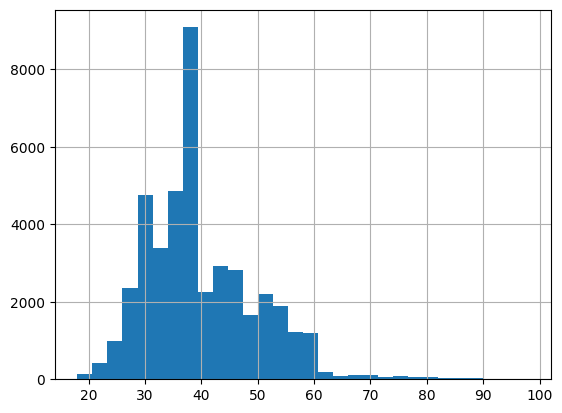

In [31]:
# Distribución de las edades (gráfico)

df["Age"].hist(bins=30)

<Axes: >

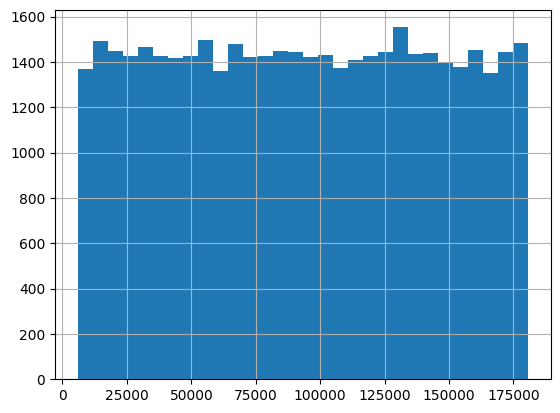

In [32]:
# Distribución de los ingresos (gráfico)

df["Income"].hist(bins=30)

In [33]:
# Edad media por estado civil

df.groupby("Marital")["Age"].mean().sort_values()

Marital
SINGLE     33.70
MARRIED    41.73
DIVORCED   44.17
Name: Age, dtype: float64

In [34]:
# Producto o servicio contratado (sí o no)

df["Service/product contracted"].value_counts()

Service/product contracted
NO     38153
YES     4842
Name: count, dtype: int64

In [35]:
# Contratación vs. duración de la  (variable clave)

df.groupby("Service/product contracted")["Duration"].mean().sort_values()

Service/product contracted
NO    220.43
YES   551.56
Name: Duration, dtype: float64

In [36]:
# Edad vs contratación de producto (qué edad media contrata y qué edad media no contrata)

df.groupby("Service/product contracted")["Age"].mean().sort_values()

Service/product contracted
NO    39.64
YES   40.55
Name: Age, dtype: float64

In [37]:
# Media de ingresos por contratación o no contratación de producto

df.groupby("Service/product contracted")["Income"].mean().sort_values()

Service/product contracted
YES   92,607.80
NO    93,325.03
Name: Income, dtype: float64

In [38]:
# Trabajo vs. contratación de producto

df["Job"].value_counts().head(10)


Job
admin.           11218
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
Name: count, dtype: int64

In [39]:
# Vemos ahora la información del trabajo solo de los que sí contrataron producto o servicio:

df[df["Service/product contracted"] == "YES"]["Job"].value_counts().head(10)

Job
admin.           1454
technician        762
blue-collar       665
retired           451
management        342
services          336
student           281
self-employed     161
unemployed        153
entrepreneur      126
Name: count, dtype: int64

In [40]:
# Estado civil vs. contratación

pd.crosstab(df["Marital"], df["Service/product contracted"], normalize="index") * 100

Service/product contracted,NO,YES
Marital,,
DIVORCED,89.82,10.18
MARRIED,89.77,10.23
SINGLE,86.08,13.92


In [41]:
# Educación vs. contratación

pd.crosstab(df["Education"], df["Service/product contracted"], normalize="index") * 100

Service/product contracted,NO,YES
Education,,
basic.4y,89.72,10.28
basic.6y,91.87,8.13
basic.9y,92.20,7.80
high.school,89.16,10.84
illiterate,77.78,22.22
professional.course,88.68,11.32
university.degree,86.18,13.82


In [42]:
# Conversión por nivel educativo:

df.groupby("Education")["Service/product contracted"] \
  .apply(lambda x: (x == "YES").mean()) \
  .sort_values(ascending=False)

Education
illiterate            0.22
university.degree     0.14
professional.course   0.11
high.school           0.11
basic.4y              0.10
basic.6y              0.08
basic.9y              0.08
Name: Service/product contracted, dtype: float64

In [43]:
# Conversión por estado civil

df.groupby("Marital")["Service/product contracted"] \
  .apply(lambda x: (x == "YES").mean()) \
  .sort_values(ascending=False)

Marital
SINGLE     0.14
MARRIED    0.10
DIVORCED   0.10
Name: Service/product contracted, dtype: float64

In [44]:
# Conversión por número de llamadas en la campaña actual

df.groupby("Current campaign calls")["Service/product contracted"] \
  .apply(lambda x: (x == "YES").mean()) \
  .sort_index()

Current campaign calls
1    0.13
2    0.11
3    0.11
4    0.09
5    0.07
6    0.08
7    0.06
8    0.05
9    0.06
10   0.06
11   0.07
12   0.02
13   0.04
14   0.01
15   0.04
16   0.00
17   0.07
18   0.00
19   0.00
20   0.00
21   0.00
22   0.00
23   0.05
24   0.00
25   0.00
26   0.00
27   0.00
28   0.00
29   0.00
30   0.00
31   0.00
32   0.00
33   0.00
34   0.00
35   0.00
37   0.00
39   0.00
40   0.00
41   0.00
42   0.00
43   0.00
56   0.00
Name: Service/product contracted, dtype: float64

In [45]:
# Conversión por duración de llamadas por segmentos de duración (en segundos)

df["duration_bin"] = pd.qcut(df["Duration"], q=5)

df.groupby("duration_bin")["Service/product contracted"] \
  .apply(lambda x: (x == "YES").mean())

C:\Users\athga\AppData\Local\Temp\ipykernel_11816\2893461025.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("duration_bin")["Service/product contracted"] \


duration_bin
(-0.001, 89.0]    0.01
(89.0, 146.0]     0.03
(146.0, 221.0]    0.07
(221.0, 367.0]    0.12
(367.0, 4918.0]   0.33
Name: Service/product contracted, dtype: float64

In [46]:
# Perfiles con mayor tasa de contratación (por educación, trabajo y estado civil). Vemos los 15 perfiles que mejor han convertido con una muestra mínima de 75 personas para evitar perfiles con pocas muestras que pueden distorsionar la tasa de conversión.

segment_stats = (
    df.groupby(["Education", "Job", "Marital"])
      .agg(
          conversion_rate=("Service/product contracted", lambda x: (x == "YES").mean()),
          sample_size=("Service/product contracted", "count")
      )
      .sort_values("conversion_rate", ascending=False)
)

segment_stats.query("sample_size >= 75").head(15)

,,,conversion_rate,sample_size
Education,Job,Marital,,
basic.9y,student,SINGLE,0.37,95
basic.4y,retired,DIVORCED,0.33,159
high.school,student,SINGLE,0.32,354
basic.4y,retired,MARRIED,0.31,449
university.degree,student,SINGLE,0.28,321
professional.course,retired,MARRIED,0.27,184
university.degree,retired,MARRIED,0.27,302
high.school,retired,MARRIED,0.24,212
university.degree,unemployed,SINGLE,0.23,107


In [47]:
# Comparo conversión con balance medio de ingresos

df.groupby(pd.qcut(df["Income"], 5))["Service/product contracted"] \
  .apply(lambda x: (x == "YES").mean())

C:\Users\athga\AppData\Local\Temp\ipykernel_11816\3247427787.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["Income"], 5))["Service/product contracted"] \


Income
(5840.999, 40691.2]    0.11
(40691.2, 75701.6]     0.11
(75701.6, 110909.2]    0.12
(110909.2, 145401.8]   0.11
(145401.8, 180802.0]   0.11
Name: Service/product contracted, dtype: float64

In [48]:
# Variables más relacionadas con la contratación

cols_relevant = [
    "Age", "Income", "Duration", "Current campaign calls", 
    "Days from last call", "Previous contacts"
]

df_encoded = pd.get_dummies(df[cols_relevant + ["Service/product contracted"]], drop_first=True)

corr_target = df_encoded.corr()["Service/product contracted_YES"].sort_values(ascending=False)

corr_target

Service/product contracted_YES    1.00
Duration                          0.40
Previous contacts                 0.23
Age                               0.03
Income                           -0.00
Current campaign calls           -0.07
Days from last call              -0.33
Name: Service/product contracted_YES, dtype: float64

In [49]:
# Mini modelo predictivo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df_encoded.drop(columns=["Service/product contracted_YES"])
y = df_encoded["Service/product contracted_YES"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95     11437
        True       0.65      0.33      0.44      1462

    accuracy                           0.90     12899
   macro avg       0.79      0.66      0.70     12899
weighted avg       0.89      0.90      0.89     12899



c:\Users\athga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Importancia de variables del modelo

importance = pd.Series(model.coef_[0], index=X.columns) \
  .sort_values(ascending=False)

importance.head(15)

Previous contacts         0.21
Duration                  0.00
Income                   -0.00
Age                      -0.00
Days from last call      -0.00
Current campaign calls   -0.14
dtype: float64

In [51]:
# Descubrimos tipos de clientes reales

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["Age", "Income", "Duration"]

X = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[X.index, "Cluster"] = kmeans.fit_predict(X_scaled)

df.groupby("Cluster")[features].mean()

,Age,Income,Duration
Cluster,,,
0.00,35.59,"47,916.31",197.53
1.00,54.14,"94,059.35",210.66
2.00,38.72,"93,176.06",932.36
3.00,35.59,"139,106.66",196.99


In [52]:
# Tamaño de clusters

df["Cluster"].value_counts()

Cluster
0.00    15452
3.00    15116
1.00     9056
2.00     3371
Name: count, dtype: int64

In [53]:
# Ranking de clientes con probabilidad de contratación más alta

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df["target"] = df["Service/product contracted"].map({"YES": 1, "NO": 0})

features = ["Age", "Income", "Duration"]
X = df[features]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11437
           1       0.51      0.24      0.33      1462

    accuracy                           0.89     12899
   macro avg       0.71      0.61      0.63     12899
weighted avg       0.86      0.89      0.87     12899



In [54]:
df["contract_probability"] = model.predict_proba(X)[:,1]

df.sort_values("contract_probability", ascending=False).head(20)

,Year,Start date,Age,Job,Education,Marital,Income,Kidhome,Teenhome,Payment default,Housing,Loan,NumWebVisitsMonth,Service/product contracted,Current campaign calls,Duration,Days from last call,Previous contacts,Interaction date,Previous marketing campaign outcome,Employment var.rate,Cons.price.idx,Cons.conf.idx,Euribor3months,Nr.employed,Latitude,Longitude,Latitude OK,Longitude OK,ID,target,duration_bin,Cluster,contract_probability
30974,2014,2018-07-05,40.00,blue-collar,basic.9y,MARRIED,178650,2,2,0.00,YES,NO,32,YES,1,954,999,0,2014-08-02,NONEXISTENT,-18,92.89,-46.20,1.33,5099,44238,-70964,44.24,-70.96,ae2a5beb-c4b3-479c-9782-90068a867973,1,"(367.0, 4918.0]",2.00,1.00
17711,2012,2017-08-25,33.00,admin.,university.degree,MARRIED,8877,1,2,0.00,NO,NO,12,YES,1,2516,999,0,2012-02-01,NONEXISTENT,14,93.92,-42.70,4.96,5228,45738,-76712,45.74,-76.71,ca47c478-eb0e-409f-8188-8c226926755b,1,"(367.0, 4918.0]",2.00,0.99
40829,2014,2016-04-18,81.00,retired,basic.4y,MARRIED,66441,0,0,0.00,YES,NO,10,YES,1,621,999,2,2014-03-10,FAILURE,-11,94.60,-49.50,1.02,4964,39895,-84221,39.90,-84.22,41d87637-cffd-413e-a9c8-4178ef9e9d18,1,"(367.0, 4918.0]",1.00,0.99
10061,2012,2016-08-20,59.00,entrepreneur,high.school,DIVORCED,96358,0,2,Unknown,YES,NO,29,YES,2,1268,999,0,2012-03-24,NONEXISTENT,14,94.47,-41.80,4.96,5228,2844,-92513,2.84,-92.51,3666781a-295a-477c-9843-5a21f7847473,1,"(367.0, 4918.0]",2.00,0.99
35103,2014,2015-01-15,30.00,blue-collar,professional.course,MARRIED,116740,1,2,0.00,NO,NO,18,YES,4,1357,999,1,2014-05-19,FAILURE,-18,92.89,-46.20,4.86,5099,35257,-75665,35.26,-75.67,b5739e25-bec2-4b03-a0d6-b89e189c9977,1,"(367.0, 4918.0]",2.00,0.99
17170,2012,2016-10-20,59.00,retired,basic.9y,MARRIED,81284,0,1,Unknown,NO,NO,6,YES,3,1330,999,0,2012-08-24,NONEXISTENT,14,93.92,-42.70,4.96,5228,35704,-88308,35.70,-88.31,bd3278a0-d7da-4d25-b4d1-72593ed7a2ea,1,"(367.0, 4918.0]",2.00,0.99
13859,2012,2019-01-19,38.00,retired,basic.4y,MARRIED,111736,2,2,Unknown,YES,NO,32,YES,2,1689,999,0,2012-05-30,NONEXISTENT,14,93.92,-42.70,4.96,5228,3725,-12447,3.73,-12.45,26f11963-c17b-4af2-b76d-5f595ad40271,1,"(367.0, 4918.0]",2.00,0.99
29835,2014,2017-04-21,19.00,student,university.degree,SINGLE,78236,1,0,0.00,YES,NO,7,YES,3,396,999,0,2014-04-04,NONEXISTENT,-18,93.08,-47.10,4.86,5099,27222,-77274,27.22,-77.27,2e17dc97-08d0-4c7a-aad6-503878f78088,1,"(367.0, 4918.0]",0.00,0.99
14767,2012,2018-07-21,55.00,housemaid,university.degree,MARRIED,160900,0,2,0.00,NO,NO,29,YES,1,988,999,0,2012-05-11,NONEXISTENT,14,93.92,-42.70,4.96,5228,28405,-8915,28.41,-8.91,d8dab372-e0e2-4c8f-a50e-0c564189d490,1,"(367.0, 4918.0]",2.00,0.98
16991,2012,2015-07-21,34.00,blue-collar,university.degree,SINGLE,15219,2,0,0.00,NO,YES,4,YES,1,1000,999,0,2012-12-09,NONEXISTENT,14,93.92,-42.70,4.96,5228,46705,-77451,46.70,-77.45,34657464-fc36-42bc-9177-522ef0e1e36b,1,"(367.0, 4918.0]",2.00,0.98


In [55]:
# Simulación de impacto de negocio si solo llamamos a los mejores heads

top_10 = df.sort_values("contract_probability", ascending=False).head(int(len(df)*0.10))
top_30 = df.sort_values("contract_probability", ascending=False).head(int(len(df)*0.30))

print("Conversión top 10%:", top_10["target"].mean())
print("Conversión top 30%:", top_30["target"].mean())
print("Conversión total:", df["target"].mean())

Conversión top 10%: 0.8899744126541056
Conversión top 30%: 0.3530004651884013
Conversión total: 0.1126177462495639


In [63]:
# Simulación del ROI

cost_per_call = 1
revenue_per_contract = 50

profit_top_30 = (top_30["target"].sum() * revenue_per_contract) - (len(top_30) * cost_per_call)
profit_all = (df["target"].sum() * revenue_per_contract) - (len(df) * cost_per_call)

print("Beneficio llamando top 30%:", profit_top_30)
print("Beneficio llamando a todos:", profit_all)

Beneficio llamando top 30%: 214752
Beneficio llamando a todos: 199105


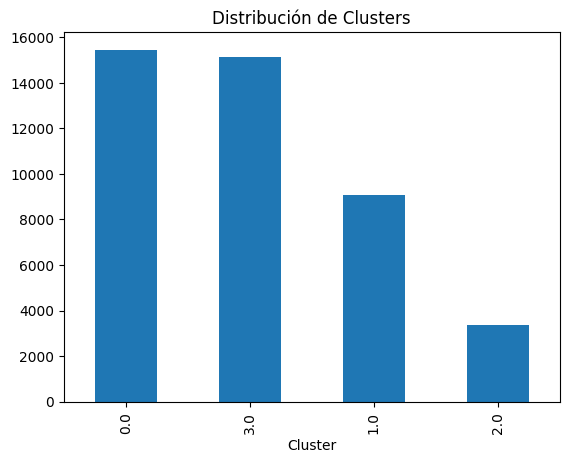

In [57]:
# Grafico de distribución de clusters

import matplotlib.pyplot as plt

df["Cluster"].value_counts().plot(kind="bar", title="Distribución de Clusters")
plt.show()

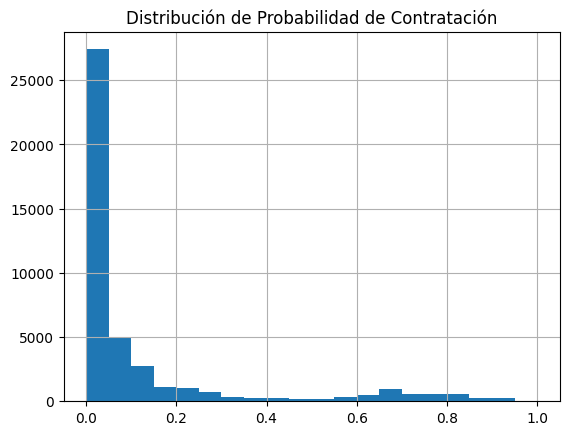

In [58]:
# Gráfico de distribución de probabilidad de contratación

df["contract_probability"].hist(bins=20)
plt.title("Distribución de Probabilidad de Contratación")
plt.show()

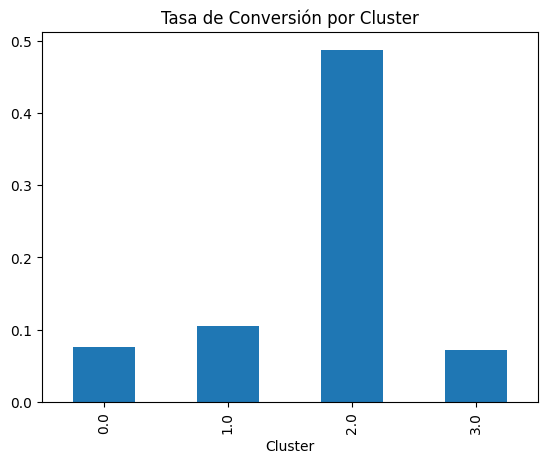

In [59]:
# Tasa de Conversión por Cluster

df.groupby("Cluster")["target"].mean().plot(kind="bar")
plt.title("Tasa de Conversión por Cluster")
plt.show()

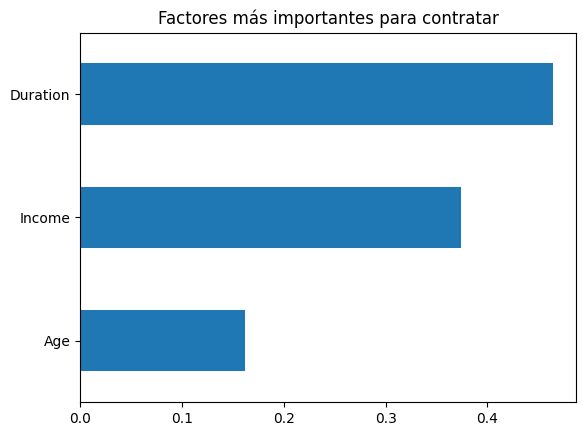

In [60]:
# Factores más importantes para contratar

importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind="barh")
plt.title("Factores más importantes para contratar")
plt.show()

In [61]:
# Creamos el mapa de calor

map_center = [df['Latitude OK'].mean(), df['Longitude OK'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Extraemos solo las columnas de latitud y longitud
heat_data = df[['Latitude OK', 'Longitude OK']].values
HeatMap(heat_data, radius=10).add_to(m)

# Guardo el mapa como HTML
m.save("mapa_calor.html")

print("Abrir 'mapa_calor.html' en el navegador (guardado en la carpeta del repositorio)")

Abrir 'mapa_calor.html' en el navegador (guardado en la carpeta del repositorio)


In [62]:
# Imprimo el notebook al completo para asegurarme de que se ejecuta sin errores de principio a fin

print("Notebook ejecutado correctamente de principio a fin")


Notebook ejecutado correctamente de principio a fin
